In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from main import TradingStrategy 

plt.style.use("ggplot")

outdir = "outputs"
os.makedirs(outdir, exist_ok=True)

symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"
budget = 10000
ma_short = 50
ma_long = 200


In [ ]:
strategy = TradingStrategy(symbol, start_date, end_date, budget)
strategy.download_data()
strategy.clean_data()
strategy.compute_indicators(ma_short=ma_short, ma_long=ma_long)


Downloaded 1006 rows successfully.
Data cleaned (duplicates removed, NaNs forward-filled).
Indicators computed using MA50 & MA200.


In [ ]:
strategy.data.head()


Price,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Prev_MA50,Prev_MA200,Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.538513,135480400,72.538513,72.538513,NaN,NaN,0
2020-01-03,74.287498,75.144997,74.125000,74.357498,71.833290,146322800,72.185902,72.185902,72.538513,72.538513,0
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.405670,118387200,72.259158,72.259158,72.185902,72.185902,0
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.065140,108872000,72.210653,72.210653,72.259158,72.259158,0
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.224419,132079200,72.413406,72.413406,72.210653,72.210653,0


In [21]:
strategy.run_backtest()


Starting backtest simulation...
2020-03-16 | BUY  | Price $   58.64 | Qty  170 | Cash $     31.92 | Total $  10000.00
2020-03-23 | SELL | Price $   54.32 | Qty  170 | Cash $   9265.80 | Total $  18499.68
2020-06-10 | BUY  | Price $   85.65 | Qty  108 | Cash $     15.71 | Total $   9265.80
2022-06-03 | SELL | Price $  142.92 | Qty  108 | Cash $  15451.31 | Total $  30886.92
2022-09-26 | BUY  | Price $  148.43 | Qty  104 | Cash $     14.90 | Total $  15451.31
2022-10-07 | SELL | Price $  137.91 | Qty  104 | Cash $  14357.85 | Total $  28700.80
2023-03-22 | BUY  | Price $  155.87 | Qty   92 | Cash $     17.56 | Total $  14357.85
2023-12-29 | SELL | Price $  190.91 | Qty   92 | Cash $  17581.62 | Total $  35145.68
Force-closed remaining position at end of data.
Backtest completed successfully.


In [22]:
summary = strategy.results()
summary


c:\Users\Dell\Downloads\Projects\GTRL-Internship-Assignment\Task1_AlgorithmicTrading\main.py:167: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row["Adj Close"]) if not np.isscalar(row["Adj Close"]) else row["Adj Close"]

=== RESULTS SUMMARY ===
Initial Budget : $10,000.00
Final Value    : $17,581.62
Net P&L        : $7,581.62 (75.82%)
Total Trades   : 8
Win Rate       : 50.00%
Max Drawdown   : -26.56%
Sharpe Ratio   : 0.70


{'final_value': 17581.621055603027,
 'pnl': 7581.621055603027,
 'pnl_pct': 75.81621055603027,
 'total_trades': 8,
 'win_rate': 50.0,
 'max_drawdown': np.float64(-26.56229260094503),
 'sharpe_ratio': np.float64(0.696169023176964)}

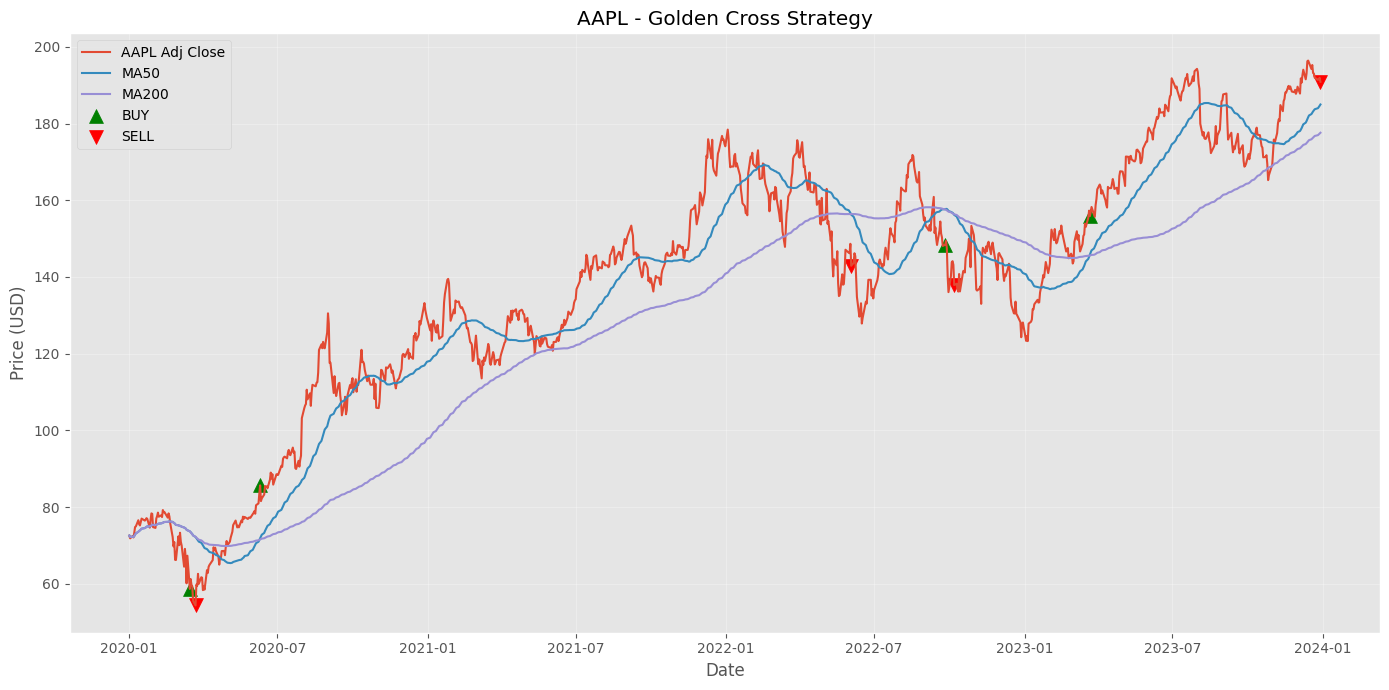

In [ ]:
df = strategy.data
plt.figure(figsize=(14,7))
plt.plot(df.index, df["Adj Close"], label=f"{symbol} Adj Close")
plt.plot(df.index, df["MA50"], label=f"MA{ma_short}")
plt.plot(df.index, df["MA200"], label=f"MA{ma_long}")

buys = [t for t in strategy.trades if t.action == "BUY"]
sells = [t for t in strategy.trades if t.action == "SELL"]

if buys:
    plt.scatter([t.date for t in buys], [t.price for t in buys],
                marker="^", color="green", s=100, label="BUY")
if sells:
    plt.scatter([t.date for t in sells], [t.price for t in sells],
                marker="v", color="red", s=100, label="SELL")

plt.title(f"{symbol} - Golden Cross Strategy")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\Dell\Downloads\Projects\GTRL-Internship-Assignment\Task1_AlgorithmicTrading\main.py:167: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row["Adj Close"]) if not np.isscalar(row["Adj Close"]) else row["Adj Close"]


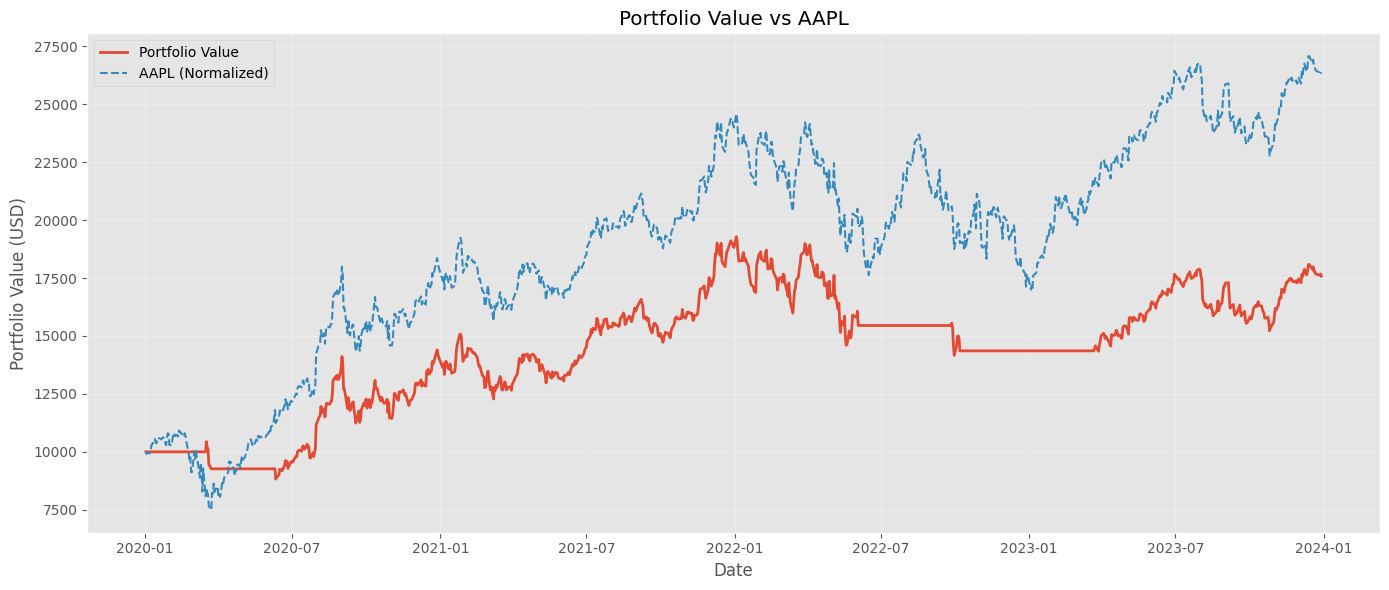

In [24]:
df_metrics, _ = strategy.compute_metrics()
plt.figure(figsize=(14,6))
plt.plot(df_metrics.index, df_metrics["Portfolio"], label="Portfolio Value", linewidth=2)
plt.plot(df_metrics.index, df_metrics["Adj Close"]/df_metrics["Adj Close"].iloc[0]*budget,
         label=f"{symbol} (Normalized)", linestyle="--")
plt.title(f"Portfolio Value vs {symbol}")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [25]:
trade_log_path = os.path.join(outdir, f"{symbol}_trades_notebook.csv")
md_report_path = os.path.join(outdir, f"{symbol}_report_notebook.md")

strategy.save_trade_log(trade_log_path)
strategy.generate_markdown_report(md_report_path)

print("Trade log:", trade_log_path)
print("Markdown report:", md_report_path)


Trade log saved to outputs\AAPL_trades_notebook.csv
Markdown trade report saved to outputs\AAPL_report_notebook.md


Trade log: outputs\AAPL_trades_notebook.csv
Markdown report: outputs\AAPL_report_notebook.md


Downloaded 1006 rows successfully.
Data cleaned (duplicates removed, NaNs forward-filled).
Indicators computed using MA20 & MA100.
Starting backtest simulation...
2020-01-31 | BUY  | Price $   74.75 | Qty  133 | Cash $     58.15 | Total $  10000.00
2020-02-28 | SELL | Price $   66.18 | Qty  133 | Cash $   8859.66 | Total $  17661.16
2020-05-12 | BUY  | Price $   75.59 | Qty  117 | Cash $     15.37 | Total $   8859.66
2021-03-12 | SELL | Price $  118.11 | Qty  117 | Cash $  13833.93 | Total $  27652.49
2021-04-22 | BUY  | Price $  128.75 | Qty  107 | Cash $     57.26 | Total $  13833.93
2021-05-21 | SELL | Price $  122.61 | Qty  107 | Cash $  13176.43 | Total $  26295.59
2021-06-23 | BUY  | Price $  130.69 | Qty  100 | Cash $    107.13 | Total $  13176.43
2022-03-11 | SELL | Price $  151.89 | Qty  100 | Cash $  15296.23 | Total $  30485.33
2022-04-07 | BUY  | Price $  168.98 | Qty   90 | Cash $     87.89 | Total $  15296.23
2022-04-27 | SELL | Price $  153.70 | Qty   90 | Cash $  13920.

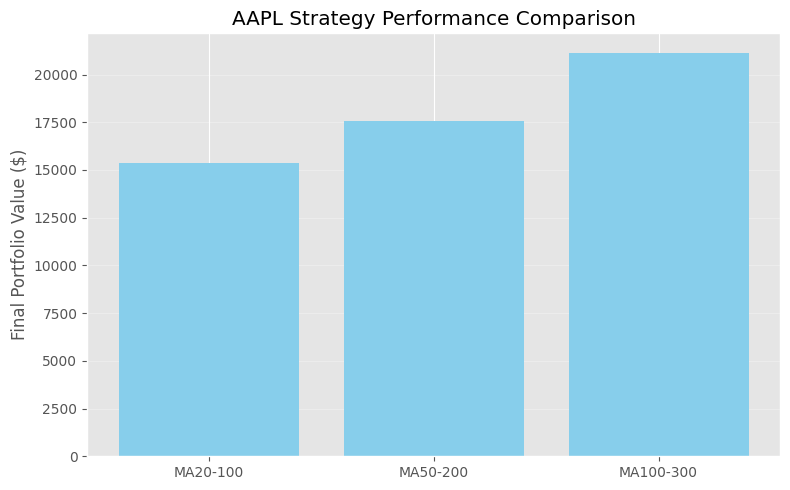

In [ ]:
ma_pairs = [(20, 100), (50, 200), (100, 300)]
results = []

for short, long in ma_pairs:
    strat = TradingStrategy(symbol, start_date, end_date, budget)
    strat.download_data()
    strat.clean_data()
    strat.compute_indicators(ma_short=short, ma_long=long)
    strat.run_backtest()
    summary = strat.results()
    results.append((f"MA{short}-{long}", summary["final_value"]))

labels, values = zip(*results)
plt.figure(figsize=(8,5))
plt.bar(labels, values, color="skyblue")
plt.ylabel("Final Portfolio Value ($)")
plt.title(f"{symbol} Strategy Performance Comparison")
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
